In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics

In [2]:
neo = pd.read_csv("neo.csv")

# neo = neo.sample(1000) # Smaller sample for demonstration purposes

neo.head()

,id,name,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,orbiting_body,sentry_object,absolute_magnitude,hazardous
0,2162635,162635 (2000 SS164),1.198271,2.679415,13569.249224,5.483974e+07,Earth,False,16.73,False
1,2277475,277475 (2005 WK4),0.265800,0.594347,73588.726663,6.143813e+07,Earth,False,20.00,True
2,2512244,512244 (2015 YE18),0.722030,1.614507,114258.692129,4.979872e+07,Earth,False,17.83,False
3,3596030,(2012 BV13),0.096506,0.215794,24764.303138,2.543497e+07,Earth,False,22.20,False
4,3667127,(2014 GE35),0.255009,0.570217,42737.733765,4.627557e+07,Earth,False,20.09,True


In [3]:
neo = neo[["est_diameter_min", "est_diameter_max", "relative_velocity", "miss_distance", "absolute_magnitude", "hazardous"]]
neo.head()

,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,absolute_magnitude,hazardous
0,1.198271,2.679415,13569.249224,5.483974e+07,16.73,False
1,0.265800,0.594347,73588.726663,6.143813e+07,20.00,True
2,0.722030,1.614507,114258.692129,4.979872e+07,17.83,False
3,0.096506,0.215794,24764.303138,2.543497e+07,22.20,False
4,0.255009,0.570217,42737.733765,4.627557e+07,20.09,True


In [4]:
print("Hazardous Asteroids amount:", neo.query('hazardous == True').hazardous.count(), "\nNon-hazardous Asteroids amount:", neo.query('hazardous == False').hazardous.count())
proportion = "%.3f" % ((neo.query('hazardous == True').hazardous.count()/neo.hazardous.count())*100)
print("Approximately, ", proportion, "% of the nearby asteroids are hazardous.", sep='')

Hazardous Asteroids amount: 8840 
Non-hazardous Asteroids amount: 81996
Approximately, 9.732% of the nearby asteroids are hazardous.


In [5]:
print("Smallest values:\n", neo.min(), "\n\n\nLargest values:\n" , neo.max())

Smallest values:
 est_diameter_min         0.000609
est_diameter_max         0.001362
relative_velocity      203.346433
miss_distance         6745.532516
absolute_magnitude           9.23
hazardous                   False
dtype: object 


Largest values:
 est_diameter_min             37.89265
est_diameter_max            84.730541
relative_velocity       236990.128088
miss_distance         74798651.452197
absolute_magnitude               33.2
hazardous                        True
dtype: object


In [6]:
print("Average values:\n" , neo.mean(), "\n\n\nMedian values:\n" , neo.median())

Average values:
 est_diameter_min      1.274321e-01
est_diameter_max      2.849469e-01
relative_velocity     4.806692e+04
miss_distance         3.706655e+07
absolute_magnitude    2.352710e+01
hazardous             9.731824e-02
dtype: float64 


Median values:
 est_diameter_min      4.836765e-02
est_diameter_max      1.081534e-01
relative_velocity     4.419012e+04
miss_distance         3.784658e+07
absolute_magnitude    2.370000e+01
hazardous             0.000000e+00
dtype: float64


In [7]:
neo['est_diameter_min'].mean()

0.12743210631522306

In [8]:
neo.sort_values(by='est_diameter_min')

,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,absolute_magnitude,hazardous
24949,0.000609,0.001362,56751.017090,1.263816e+04,33.20,False
45661,0.000683,0.001528,69293.963546,6.947159e+07,32.95,False
88408,0.000683,0.001528,70539.503442,7.254528e+07,32.95,False
51038,0.000683,0.001528,56370.197452,5.196340e+07,32.95,False
75986,0.000683,0.001528,30725.628392,1.686312e+07,32.95,False
...,...,...,...,...,...,...
72472,8.640820,19.321462,86394.013285,6.737501e+07,12.44,False
56533,23.043847,51.527608,21761.703426,3.120592e+07,10.31,False
37651,23.043847,51.527608,21402.705247,2.672952e+07,10.31,False
12709,23.043847,51.527608,15884.252623,5.468808e+07,10.31,False


Text(0, 0.5, 'Relative Velocity')

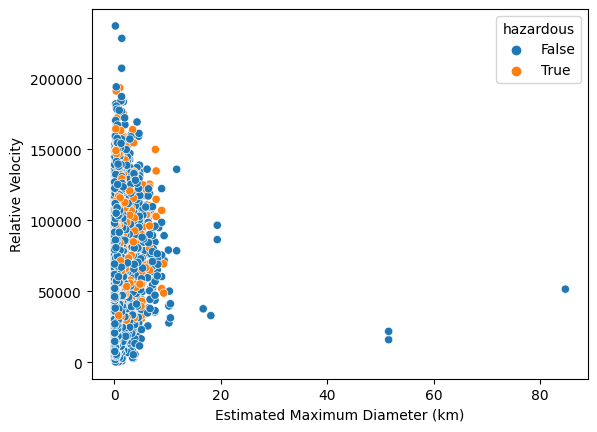

In [9]:
sns.scatterplot(data=neo, x='est_diameter_max', y='relative_velocity', hue='hazardous')
plt.xlabel("Estimated Maximum Diameter (km)")
plt.ylabel("Relative Velocity")


In [10]:
neo = neo.query('est_diameter_max <= 40')

Text(0, 0.5, 'Relative Velocity')

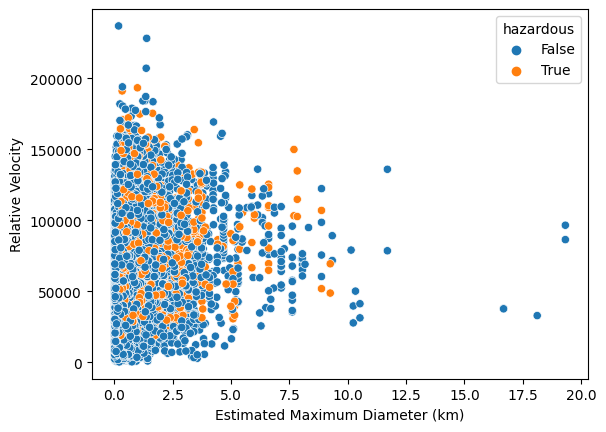

In [11]:
sns.scatterplot(data=neo, x='est_diameter_max', y='relative_velocity', hue='hazardous')
plt.xlabel("Estimated Maximum Diameter (km)")
plt.ylabel("Relative Velocity")


array([[<AxesSubplot:title={'center':'est_diameter_min'}>]], dtype=object)

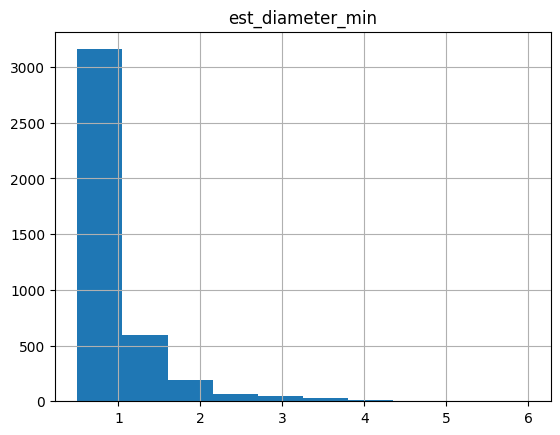

In [12]:
neo.hist(column="est_diameter_min", range=[.5, 6])

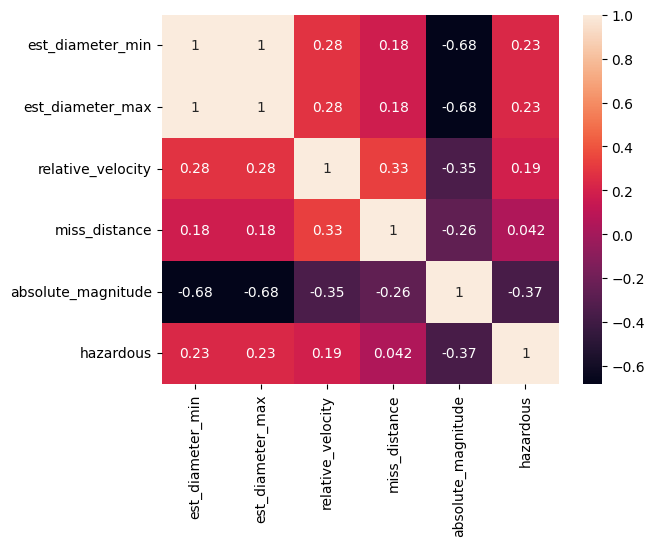

In [13]:
correlation_mat = neo.corr()
sns.heatmap(correlation_mat, annot = True)
plt.show()

In [14]:
### Making data amounts proportionate:

neo_false_half = neo.query('hazardous == False').sample(8840)

to_combine = [neo.query('hazardous == True'), neo_false_half]
neo = pd.concat(to_combine)
neo.sample(10)

,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,absolute_magnitude,hazardous
74195,0.127220,0.284472,46529.482862,1.321311e+07,21.60,True
5742,0.121494,0.271669,98344.655162,7.461931e+07,21.70,False
58761,0.030238,0.067615,46250.259637,5.409047e+07,24.72,False
80899,0.494943,1.106726,56003.566476,1.979125e+07,18.65,False
83810,0.029144,0.065169,19051.711040,1.340860e+07,24.80,False
36570,0.006376,0.014257,49242.101938,3.182595e+07,28.10,False
55037,0.088421,0.197715,109156.773118,6.811848e+07,22.39,False
34403,0.004411,0.009864,50655.981806,8.056710e+05,28.90,False
19651,1.187285,2.654850,61042.668165,3.387008e+06,16.75,True
31704,0.108282,0.242125,31160.392288,4.722908e+07,21.95,False


In [15]:
# Sauce: https://www.geeksforgeeks.org/data-normalization-with-pandas/

# Copying the dataset for a backup, just in case:
neoNeo = neo.copy()

# Normalizing our data using min-max feature scaling:
for column in neoNeo.columns:
	if(column != 'hazardous'):
		neoNeo[column] = (neoNeo[column] - neoNeo[column].min()) / (neoNeo[column].max() - neoNeo[column].min())


In [16]:
# Splitting the data into input and output columns
X, y = neoNeo.values[:, :-1], neoNeo.values[:, -1]

# ensure all values are floatinf types
X = X.astype('float32')

# Encode strings to integer
y = LabelEncoder().fit_transform(y)

# Split into training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

# Determine the number of features
n_features = X_train.shape[1]
print('Number of features:', n_features)

(11845, 5) (5835, 5) (11845,) (5835,)
Number of features: 5


In [21]:
# Step-1 Define Model:
model= Sequential()
model.add(Dense(10, activation='relu', kernel_initializer='he_normal', input_shape=(n_features,)))  # Hidden Layer 1
model.add(Dense(8, activation='relu', kernel_initializer='he_normal')) # Hidden Layer 2
model.add(Dense(1, activation='sigmoid'))  # Output Layer

# Step-2 Compile the model:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics= ['accuracy'])

# Step-3 Fit the model:
model.fit(X_train, y_train, epochs=50, batch_size=64, verbose=2)

# Step-4 Evaluate the model:
loss, acc = model.evaluate(X_test, y_test, verbose=0)
print('Test accuracy : %.3f' %acc)

Epoch 1/50
186/186 - 0s - loss: 0.6643 - accuracy: 0.6162 - 498ms/epoch - 3ms/step
Epoch 2/50
186/186 - 0s - loss: 0.5716 - accuracy: 0.7360 - 144ms/epoch - 772us/step
Epoch 3/50
186/186 - 0s - loss: 0.4922 - accuracy: 0.7759 - 138ms/epoch - 744us/step
Epoch 4/50
186/186 - 0s - loss: 0.4433 - accuracy: 0.8068 - 142ms/epoch - 763us/step
Epoch 5/50
186/186 - 0s - loss: 0.4137 - accuracy: 0.8229 - 139ms/epoch - 747us/step
Epoch 6/50
186/186 - 0s - loss: 0.3931 - accuracy: 0.8341 - 178ms/epoch - 956us/step
Epoch 7/50
186/186 - 0s - loss: 0.3769 - accuracy: 0.8435 - 142ms/epoch - 762us/step
Epoch 8/50
186/186 - 0s - loss: 0.3644 - accuracy: 0.8469 - 143ms/epoch - 771us/step
Epoch 9/50
186/186 - 0s - loss: 0.3550 - accuracy: 0.8522 - 143ms/epoch - 767us/step
Epoch 10/50
186/186 - 0s - loss: 0.3476 - accuracy: 0.8579 - 140ms/epoch - 753us/step
Epoch 11/50
186/186 - 0s - loss: 0.3422 - accuracy: 0.8590 - 142ms/epoch - 763us/step
Epoch 12/50
186/186 - 0s - loss: 0.3378 - accuracy: 0.8609 - 138m

In [18]:
# row=[[0.646480, 1.445573, 43098.374254, 0.000000464056, 18.070]] # For a singular prediction, left unused at this point

# Step-5 Make a prediction:

prediction = model.predict(X_test) # Checking all of our model's results for an eventual comparison

prediction = prediction.reshape(len(prediction), ) # Reshaping our prediction numpy array to match y_test's format

prediction = np.where(prediction < .5, 0, prediction) # Transforming the float32 results into binary ones
prediction = np.where(prediction >= .5, 1, prediction) # Ditto

print('Predictions:\n', prediction)

183/183 [==============================] - 0s 622us/step
Predictions:
 [0. 0. 0. ... 1. 1. 0.]


In [19]:
"""

Confusion Matrix with the following structure:

+----+----+
| TP | FP |
+----+----+
| FN | TN |
+----+----+

"""

print(confusion_matrix(y_test, prediction))

[[2193  688]
 [  40 2914]]


In [20]:
# ROC Curve (no funciona):

fpr, tpr, thresholds = metrics.roc_curve(y_test, prediction, pos_label=2)
metrics.auc(fpr, tpr)

C:\Users\Martin Roca\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_ranking.py:1018: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


nan